# Logistic Regression using Tensor

## Hypothesis: $H(X) = \theta_0 + \theta_1 \times X_1 + \theta_2 \times \ X_2$

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import tensor
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading Data

In [2]:
data = pd.read_csv("data_3_1_2.csv")

In [3]:
data.head()

,x1,x2,class
0,9.076,3.721,0
1,6.809,3.930,0
2,8.256,2.851,1
3,8.461,3.145,1
4,6.783,3.188,1


### Split X and y then scale X

In [4]:
data_arr = data.to_numpy()

X = data_arr[:, :-1]
y = data_arr[:, -1]

X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [5]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [6]:
X_new = torch.concat((torch.ones(X_tensor.size(0), 1), X_tensor), dim=1)

### Visualizing Data

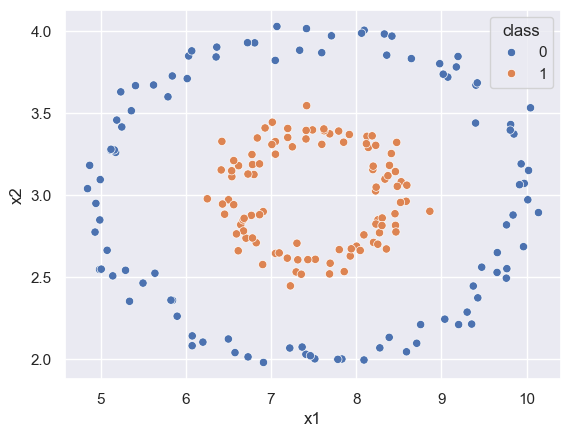

In [7]:
sns.scatterplot(data=data, x=data['x1'], y=data['x2'], hue=data['class'])
plt.show()

### Model Building

In [8]:
def hyp(X, theta):
    return torch.sigmoid(torch.matmul(X, theta))

In [9]:
epochs = 500
lr = 1
theta = torch.zeros((3, 1), dtype=torch.float32, requires_grad=True)

optimizer = optim.SGD([theta], lr=1)
cost_func = nn.BCELoss()

for epoch in range(epochs):
    h = hyp(X_new, theta)
    cost = cost_func(h, y_tensor)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch+1:03d}, Cost={cost}")

Epoch: 001, Cost=0.6931471824645996
Epoch: 101, Cost=0.692996621131897
Epoch: 201, Cost=0.692996621131897
Epoch: 301, Cost=0.692996621131897
Epoch: 401, Cost=0.692996621131897


In [10]:
h = hyp(X_new, theta)
y_hat = torch.clone(y_tensor)
y_hat[h>=0.5] = 1
y_hat[h<0.5] = 0
Accuracy = (y_hat==y_tensor).sum().item() / y_tensor.size(0)
print(f"Accuracy: {Accuracy:.4f}")

Accuracy: 0.5150


## Hypothesis $H(X) = \theta_0 + \theta_1 \times X_1 + \theta_2 \times  X_2 + \theta_3 \times X_3^2 + \theta_4 \times X_4^2$

In [11]:
X_new_1 = torch.concat((X_tensor, X_tensor**2), dim=1)
X_new_1 = torch.concat((torch.ones(X_new_1.size(0), 1), X_new_1), dim=1)
X_new_1[:5]

tensor([[ 1.0000,  1.1674,  1.3540,  1.3629,  1.8334],
        [ 1.0000, -0.5045,  1.7439,  0.2545,  3.0410],
        [ 1.0000,  0.5627, -0.2687,  0.3166,  0.0722],
        [ 1.0000,  0.7139,  0.2797,  0.5096,  0.0782],
        [ 1.0000, -0.5237,  0.3599,  0.2742,  0.1295]])

In [12]:
epochs = 500
theta = torch.zeros((5, 1), dtype=torch.float32, requires_grad=True)

optimizer = optim.SGD([theta], lr=1)
cost_func = nn.BCELoss()
cost_list = []

for epoch in range(epochs):
    h = hyp(X_new_1, theta)
    cost = cost_func(h, y_tensor)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()
    cost_list.append(cost)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch+1:03d}, Cost={cost}")

Epoch: 001, Cost=0.6931471824645996
Epoch: 101, Cost=0.03662968799471855
Epoch: 201, Cost=0.019058091565966606
Epoch: 301, Cost=0.013033184222877026
Epoch: 401, Cost=0.009966130368411541


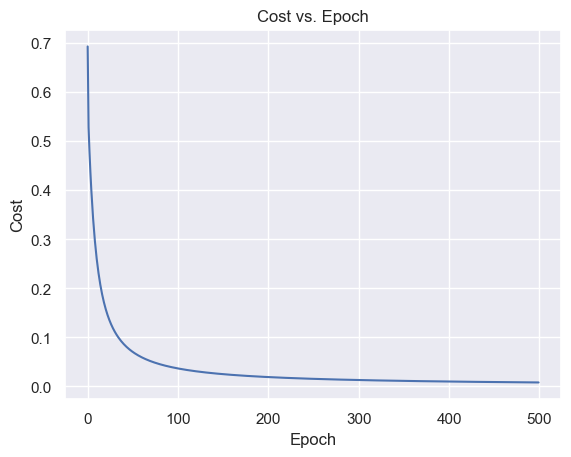

In [13]:
plt.plot(tensor(cost_list).detach().numpy())
plt.title("Cost vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

In [14]:
print(theta[0].item())

6.910866737365723


In [15]:
delta = theta[2]**2 - 4*theta[4]*(theta[0]+theta[1]*X_new_1[:,1]+theta[3]*(X_new_1[:,1]**2))

x2_new1 = (-theta[2] + torch.sqrt(delta)) / (2*theta[4])
x2_new2 = (-theta[2] - torch.sqrt(delta)) / (2*theta[4])

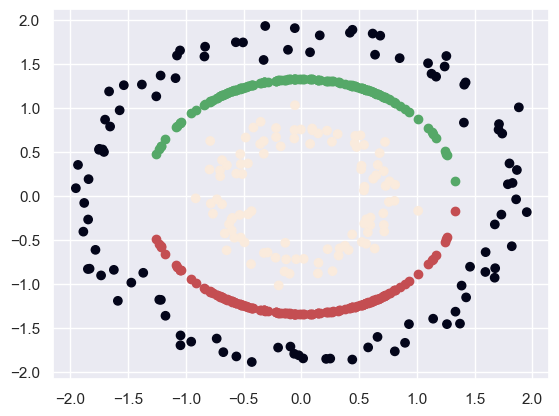

In [16]:
# construct class boundary in the second model

plt.scatter(x=X_new_1[:,1], y=X_new_1[:,2], c=y_tensor)

plt.scatter(X_new_1[:,1].detach().numpy(), x2_new1.detach().numpy(), c='r')
plt.scatter(X_new_1[:,1].detach().numpy(), x2_new2.detach().numpy(), c='g')

plt.show()

In [18]:
h = hyp(X_new_1, theta)
y_hat = torch.clone(y_tensor)
y_hat[h>=0.5] = 1
y_hat[h<0.5] = 0
Accuracy = (y_hat==y_tensor).sum().item() / y_tensor.size(0)
print(f"Accuracy: {Accuracy:.4f}")

Accuracy: 1.0000
